# Assignment 2 - Machine Learning Basics

## *Allison Young*
Netid:  *ary13*

Github link: *Link to the github repo with your completed assignment*

## Learning Objectives:
1. Be able to apply basic regression and classification supervised learning techniques to data and evaluate the performance of those methods
2. Understand the bias-variance tradeoff and how adjusting model flexibility impacts model selection and the training process

# Conceptual Questions

## 1
**[5 points]**

For each part (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

1. The sample size $n$ is extremely large, and the number of predictors $p$ is small.
2. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.
3. The relationship between the predictors and response is highly non-linear.
4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

### 1-ANSWER

*1. Better.*

Because the n is very large, a flexible model can work well because it increases the power, and having fewer predictors means the relationships can be more easily explained and interpreted.

*2. Worse.*

The situation of many predictors and fewer ns is presented, it puts you at high risk of overfitting the data, as you have many factors you are trying to understand about a small sample. Additionally, with a lot of predictors, interpreting a flexible method could become extremely difficult.

*3. Better.*

In this case, a flexible model could be helpful, because you can translate your data into a more workable format, such as taking a log of the variable, to create a simplified model.

*4. Worse.*

In this situation, some values are close to the fit line, while others are far away. In this instance, the noise created by the variance could be distracting and misleading to a flexible model.


## 2
**[5 points]** For each of the following, (i) explain if each scenario is a classification or regression problem, (ii) indicate whether we are most interested in inference or prediction for that problem, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

## 2- ANSWER

**A**

This scenario is a **Regression** problem, as the the outcome variable is continuous (salary). It is most interested in **inference**, as it is attempting to understand rather than predict specific salaries. Finally, **n = 500** ( the number of firms/data), and **p= 3** (profit, number of employees, and industry).


**B**

This scenario is a **Classification** problem, as the the outcome is binary (success or failure). It is most interested in **prediction**, as it is attempting to predict whether a new product will succeed or fail. Finally, **n = 20** ( the number of projects), and **p= 13** ( product price, marketing budget, competition price, + 10 additional).


**C**

This scenario is a **Regression** problem, as the the outcome is continuous(% change in US dollar). It is most interested in **prediction**, as it is attempting to predict change in the US dollar as compareed to the world stock market changes. Finally, **n = 52** ( the number of weeks in a year), and **p= 3** ( US % market change, British % market change, German % market change).



# Practical Questions

## 3
**[20 points] Classification I: Creating a classification algorithm**.

**(a)** Build a working version of a binary kNN classifier using the skeleton code below.

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional ($p = 2$ features/predictors) and a high dimensional ($p = 100$ features/predictors). For each of these datasets there are $n=100$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each. Calculate the time it takes to make the predictions in each case and the overall accuracy of each set of test data predictions.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?

## 3-ANSWER

### A.  Build kNN classifier

*kNN Class*

Below is the code for a working kNN classifier class. The class involves an initialization and two functions. The class object is initialized with a blank training matrix and blank training vector, which are assigned references of self.x and self.y The function "fit",  accepts self, a matrix (x), and a vector (y), and assigns their values to self.x and self.y respectively.

*knn.Predict(x,y)*

The bulk of this classes functionality occurs in the "predict" function. This function accepts self, a matrix (x), which represents the test matrix, and k, which represents the threshold of the kNN classifier. The function returns a vector y_hat, with a series of predictions for the test matrix values.

The function creates a series of temporary matrices that represent n duplications of each ith row of the test matrix. For each tile, this function creates an array that holds the element-wise difference between the temporary matrix i values and the test matrix values. This difference array is then summed across all d rows (the number of which differ by the number of parameters (xdim[1]), and the square root of this sum is taken. The resulting array represents the distance between each test matrix (x, relabeled xpred) row and the ith row of the the test matrix. 

The purpose of this process is to identify the k closest points to the ith value in the test matrix. This step is completed by using argsort to identify the index values of the top (smallest) k distances in the distance array, as these inidicies will identify the rows which hold the closest values to the ith row. By then cross referencing these indicies with those of the true y values, the function can then identifying the "average" value between 0 and 1 of these k points. This rounded average represents the majority class of the k points, and is thus the prediction selected for the ith point of the test matrix, represented by p. For each temporary matrix, this p variable is appended to the y_hat vector, which is returned from the function.

*accuracy function*

The accuracy function accepts two vectors: y and y_hat, and returns a value called accuracy, that holds the percent of y_hat values that match the y values of all the n values. 

**Code for A:**


In [1]:
import numpy as np


# A
#######################################################################
# Write your own kNN classifier
#######################################################################

#file 4 (X train low)
#file 8(y train low)
#p = 2 (2 columns)
#k = 5 (threshold)
        
#file5 (x train high)
#file 7 (y train high)
#p= 100 (100 columns)
#k = 5 (threshold)
        

class Knn:
# k-Nearest Neighbor class object for classification training and testing
    def __init__(self):
        self.x = []
        self.y = []
        
    def fit(self, x, y):   #x is a training matrix, y is a training vector (training data)
        # Save the training data to properties of this class
        self.x = x
        self.y = y
        # now the training data are written in self and can be referenced by self.x or self.y
        
        
               
    def predict(self, x, k):    #x is a test matrix, k is the threshold
        y_hat = [] # Variable to store the estimated class label for 
                
        #x-predict: matrix of test x
        xpred = np.asarray(x)
        
             
        # Calculate the distance from each vector in x to the training data
        # sq((xpred[0,0]-self.x[0,0])^2 + (x.pred[0,1]-self.x[0,1])^2)
        
        #First, create temporary matricies to operate on self.x
        #print (xpred)
        xdim = xpred.shape
        n = xdim[0]    # number of features
        #print (n)
        d= xdim[1]     # number of diminsions/parameters
        r = 1          # repetitions for temporary matricies     
        
        for i in range(n):
                # Create matrix from row
                temp = []
                repetitions = (n, r)
                temp = np.tile(xpred[i,], repetitions) 
                               
                #subtract values from predicted and self 
                diff = []
                diff= np.subtract(xpred,temp)
                
                #square x and y differences
                diffsq= np.square(diff)
                
                #sum x and y squares
                dist= []
                dist = np.sum(diffsq,axis=1)
                
                #square roots to get a list of distances
                dist= np.sqrt(dist)
                
                               
                #sort by distance and pick top k
                x = np.argsort(dist)[:k]
                
                #select prediction of top ones
                p= np.round(np.sum((np.array([self.y.values[a] for a in x])/k)))
                y_hat.append(p)
                                   
        #print("created temp arrays")
        # Return the estimated targets
        return y_hat

# Metric of overall classification accuracy
#  (a more general function, sklearn.metrics.accuracy_score, is also available)
def accuracy(y,y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy

print("Cell has run")

Cell has run


### B. Load Data

The code below loads the training and test data from the assignments folder and assigns them a name.

**Code for B:**

In [2]:

# B
#######################################################################
# Load Data
#######################################################################
import pandas as pd

xtestH = pd.read_csv("./data/A2_X_test_high.csv")
xtestL = pd.read_csv("./data/A2_X_test_low.csv")
xtrainH = pd.read_csv("./data/A2_X_train_high.csv")
xtrainL = pd.read_csv("./data/A2_X_train_low.csv")
ytestH = pd.read_csv("./data/A2_y_test_high.csv")
ytestL = pd.read_csv("./data/A2_y_test_low.csv")
ytrainH = pd.read_csv("./data/A2_y_train_high.csv")
ytrainL = pd.read_csv("./data/A2_y_train_low.csv")
print("Files Loaded")

#print(xtrainL)
#print(ytrainL)


Files Loaded


### C. Train kNN on Low and High Dimension Data; record time

**Code for C:**


In [3]:
# C
#######################################################################
# Evaluate the performance of your kNN classifier on a low- and a high-dimensional dataset 
#   and time the predictions of each
#######################################################################
import time

### My kNN Low

startAYL = time.time()
Ltest = Knn()
Ltest.fit(xtrainL,ytrainL)
result = Ltest.predict(xtestL,5)
endAYL = time.time()

y_hat= np.asarray(result)
y = ytestL

# My kNN High

startAYH = time.time()
Htest = Knn()
Htest.fit(xtrainH,ytrainH)
result = Htest.predict(xtestH,5)
endAYH = time.time()

y_hatH= np.asarray(result)
yH = ytestH

from sklearn.neighbors import KNeighborsClassifier

# "Golden Standard" kNN Low

startGL = time.time()
goldenL = KNeighborsClassifier(n_neighbors=5)
goldenL.fit(xtrainL,ytrainL) 
goldenL_y = goldenL.predict(xtestL)
endGL = time.time()

# "Golden Standard" kNN High

startGH = time.time()
goldenH = KNeighborsClassifier(n_neighbors=5)
goldenH.fit(xtrainH,ytrainH) 
goldenH_y = goldenH.predict(xtestH)
endGH = time.time()

print("Cell has run")

Cell has run


C:\Users\ayoung\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\ayoung\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


### D. Comparing Accuracy and Speed of my kNN Classifier vs KNeighborsClassifier

In looking at the 4 different implementations above, one can summize that **my kNN Classifier is slightly more accurate** than the KNeighborsClassifier. However, the sacrifice is that **my kNN Classifier is significantly slower** for low dimensions than the built-in classifier; and for high dimensions, the built-in classifier is twice as fast as mine.


In [4]:
# D
#######################################################################
# How do the two kNN classifiers compare?
#######################################################################

print("My kNN Accuracy, Low Dim: {:.3f}".format(accuracy(y.values[:,0], y_hat)))
print("Elapsed Time: {:.2f} ms".format((endAYL-startAYL)*1000))
print("")
print("My kNN Accuracy, High Dim: {:.3f}".format(accuracy(y.values[:,0], y_hatH)))
print("Elapsed Time: {:.2f} ms".format((endAYH-startAYH)*1000))
print("")
print("")
print("KNeighborsClassifier Accuracy, Low Dim: {:.3f}".format(accuracy(y.values[:,0], goldenL_y)))
print("Elapsed Time: {:.2f} ms".format((endGL-startGL)*1000))
print("")
print("KNeighborsClassifier Accuracy, High Dim: {:.3f}".format(accuracy(yH.values[:,0], goldenH_y)))
print("Elapsed Time: {:.2f} ms".format((endGH-startGH)*1000))



My kNN Accuracy, Low Dim: 0.941
Elapsed Time: 162.49 ms

My kNN Accuracy, High Dim: 0.998
Elapsed Time: 1241.53 ms


KNeighborsClassifier Accuracy, Low Dim: 0.925
Elapsed Time: 15.62 ms

KNeighborsClassifier Accuracy, High Dim: 0.993
Elapsed Time: 184.85 ms


### E. Potential Drawbacks of a Slow Prediction Process

If you have a slow prediction process, you may not be able to use this kind of classifyier for projects or calculations that require real-time solutions. Addition if his classification is just a small part of a larger process, it may slow down the rest of the process.

## 4
**[10 points] Classification II**. The table below provides a training dataset containing six observations ($n=6$), three predictors ($p=3$), and one qualitative response variable.

*Table 1. Dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use this dataset to make a prediction for $y$ when $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction with $K=1$? Why?

**(c)** What is our prediction with $K=3$? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

## 4- ANSWER:

### A. Compute Euclidean Distance 

Below is code that uses the provided array ad vector and the euclidian distance function to calculate the distances between the test observation ([0,0,0]) and the provided observations in X. The reulting table is featured below:

*Table 1. Dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$ and $distance$ from observation to test observation([0,0,0])*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   | $distance$  |
|------|-------|-------|-------|-------|-------------|
| **1**| 0     | 3     | 0     | Red   | 3.00        |
| **2**| 2     | 0     | 0     | Red   | 2.00        |
| **3**| 0     | 1     | 3     | Red   | 3.16        |
| **4**| 0     | 1     | 2     | Blue  | 2.24        |
| **5**| -1    | 0     | 1     | Blue  | 1.41        |
| **6**| 1     | 1     | 1     | Red   | 1.73        |

**Code for A:**

In [5]:
# A
#==============================
#Euclidean Distance Table
#=============================


import numpy as np
from scipy.spatial import distance
X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
y = np.array(['r','r','r','b','b','r'])

x_test = np.array([[0,0,0]])

from sklearn.neighbors import KNeighborsClassifier

# Prediction K= 5
golden = KNeighborsClassifier(n_neighbors=5)
golden.fit(X,y) 
golden_y = golden.predict([[0,0,0]])
print("K=5 prediction:",golden_y)

# Calculate Distances
dist0 = distance.euclidean(x_test, X[0])
dist1 = distance.euclidean(x_test, X[1])
dist2 = distance.euclidean(x_test, X[2])
dist3 = distance.euclidean(x_test, X[3])
dist4 = distance.euclidean(x_test, X[4])
dist5 = distance.euclidean(x_test, X[5])


distances = [dist0,dist1,dist2, dist3, dist4, dist5]


#use pandas to make a table
distdata = pd.DataFrame(columns= ['x1','x2','x3'],data=X)
distdata['y'] = y
distdata["distance"] = distances
print(distdata)



K=5 prediction: ['r']
   x1  x2  x3  y  distance
0   0   3   0  r  3.000000
1   2   0   0  r  2.000000
2   0   1   3  r  3.162278
3   0   1   2  b  2.236068
4  -1   0   1  b  1.414214
5   1   1   1  r  1.732051


### B. Prediction at k= 1

The prediction for k=1 is **"Blue"**. 

When the threshold (k) is 1, the prediction is assigned the outcome value of the closest observation. The closest observation to the test observation ([0,0,0]) is Blue (Observation 4). Therefore, the prediction is also "Blue".

### C. Prediction at k=3

The prediction for k=3 is **"Red"**.

When the threshold (k) is 3, the prediction is assigned the average outcome value of the closest k observations. The closest three observations are considered in this example (Observations 1, 4, and 5). Since two out of these three are "Red", the predicition takes the value of the majority: "Red." 

**Code for B and C:**


In [6]:
#B
#=========================
# Prediction at K= 1
#==========================
golden = KNeighborsClassifier(n_neighbors=1)
golden.fit(X,y) 
golden_y = golden.predict([[0,0,0]])
print("K=1 prediction:", golden_y)

# Because the closest value is Blue (observation 4), with a threshold of 1, the prediction is Blue.

#C
#==========================
# Prediction K= 3
#===========================
golden = KNeighborsClassifier(n_neighbors=3)
golden.fit(X,y) 
golden_y = golden.predict([[0,0,0]])
print("K=3 prediction:", golden_y)

# When the closest three observations are considered (Obs 1,4, and 5), two out of the three are Red, and thus the predicition takes
# the value of the majority, "Red"



K=1 prediction: ['b']
K=3 prediction: ['r']


### D. If Bayes decision boundary is highly non-linear, do we expect K to be small or large?

If the optimal decision boundary was highly non-linear, we would expect the **k value to be extremely low**, as the predictions
would follow the features closely, highly influenced by bias, and create a non-linear boundary line. A higher k would create 
a smoother line, as the variance becomes smaller and a less erratic boundary is formed.



## 5
**[20 points] Bias-variance tradeoff I: Understanding the tradeoff**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Scatterplot your random samples with each class in a different color

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. For each of these 100-sample datasets, fit three k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, with 3 trained classifiers).

**(d)** For each combination of dataset trained classifier, in a 3-by-3 grid, plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). Each column should represent a different value of $k$ and each row should represent a different dataset.

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

## 5- ANSWER

### A. Generate Datasets

Below is code that uses "make moons" and pandas' dataframe functionality to create a dataframe with a random sample of n=1000. 

The first five observations are printed in a table below, as preview of this sample.

**Code for A**

In [7]:
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
import pandas as pd
import numpy as np

# A
# ============
# Generate datasets
# ============

np.random.seed(26)

n_samples = 1000
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.35)

#use pandas to make a table
dataset = pd.DataFrame(columns= ['x1','x2'],data=noisy_moons[0])
dataset['y'] = noisy_moons[1]
dataset.head()


,x1,x2,y
0,1.069603,0.158959,1
1,1.049664,-0.416928,1
2,-0.190452,0.705058,0
3,2.099765,0.268989,1
4,0.245140,0.867059,0


### B. Scatterplot of Random Sample

Below is code that creates a scatterplot of the random sample created with make moons.

**Code for B:**

In [8]:
import matplotlib.pyplot as plt
# B
#=======================
# Scatterplot
#========================
fig4=plt.figure(figsize= (8,8))

plt.scatter(data =dataset,x= 'x1', y ='x2' , c='y')
#plt.legend(dataset['y'])
plt.title("Make Moons Random Sample, n=1000", fontsize=16)
plt.xlabel("X Values", fontsize=14)
plt.ylabel("Y Values", fontsize=14)
#plt.legend()


txt="Purple = '0', Yellow = '1'"

fig4.text(.7, .05, txt, ha='left')

plt.show()

<Figure size 800x800 with 1 Axes>

### C. Create Sample Datasets from Make Moons Random Sample

Below is code that creates a set of three random samples created from the make moons random sample.

**Code for C:**

In [9]:

# C
#===========================
# Random 100 from dataset
#===========================


s1 = dataset.sample(n=100,random_state=16)
s2 = dataset.sample(n=100, random_state=26)
s3 = dataset.sample(n=100, random_state=36)

print("Cell has run")


Cell has run


### D. Create kNN Classifier for k=1, k=25, and k=50 for each of the 3 Sub-samples

Below is code that creates a set of three kNN classifiers for each of the 3 sub-samples created from the make moons random sample.

**Code for D:**

In [10]:
# D
#============================
# Classifiers for K=1 , K=25, K=50; each of 3 samples
#===========================

#arr = np.asarray(dataset)
#print( arr[0:10,:])
#y = arr[:,2]
#X = arr[:,:-1]
#print(y[0:10,])
#print(X[0:10,])

s1a = np.asarray(s1)
y1 = s1a[:,2]
S1 = s1a[:,:-1]

s2a = np.asarray(s2)
y2 = s2a[:,2]
S2 = s2a[:,:-1]

s3a = np.asarray(s3)
y3 = s3a[:,2]
S3 = s3a[:,:-1]


#===========================
#Sample S1
#===========================
#Prediction K= 1
s1neigh1 = KNeighborsClassifier(n_neighbors=1)
m_1_1= s1neigh1.fit(S1,y1) 

print(m_1_1)

##Prediction K= 25
s1neigh2 = KNeighborsClassifier(n_neighbors=25)
m_1_25= s1neigh2.fit(S1,y1) 

##Prediction K= 50
s1neigh3 = KNeighborsClassifier(n_neighbors=50)
m_1_50 = s1neigh3.fit(S1,y1) 

#==========================
# Sample S2
#===========================

#Prediction K= 1
s2neigh1 = KNeighborsClassifier(n_neighbors=1)
m_2_1=s2neigh1.fit(S2,y2) 

##Prediction K= 25
s2neigh2 = KNeighborsClassifier(n_neighbors=25)
m_2_25 =s2neigh2.fit(S2,y2) 

##Prediction K= 50
s2neigh3 = KNeighborsClassifier(n_neighbors=50)
m_2_50= s2neigh3.fit(S2,y2) 


#===========================
#Sample S3
#===========================
#Prediction K= 1
s3neigh1 = KNeighborsClassifier(n_neighbors=1)
m_3_1=s3neigh1.fit(S3,y3) 

##Prediction K= 25
s3neigh2 = KNeighborsClassifier(n_neighbors=25)
m_3_25=s3neigh2.fit(S3,y3) 

##Prediction K= 50
s3neigh3 = KNeighborsClassifier(n_neighbors=50)
m_3_50=s3neigh3.fit(S3,y3) 

print("Cell has run")
#X,Y = make_moons

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')
Cell has run


### D.(Cont.) Create 3x3 grid of kNN by Sample (k in rows, S in Y)

Below is code that charts a 3x3 grid with k = 1, 25, 50 represented in the rows, and Sample = S1,S2, S3 represented in the columns.

**Code for D:**

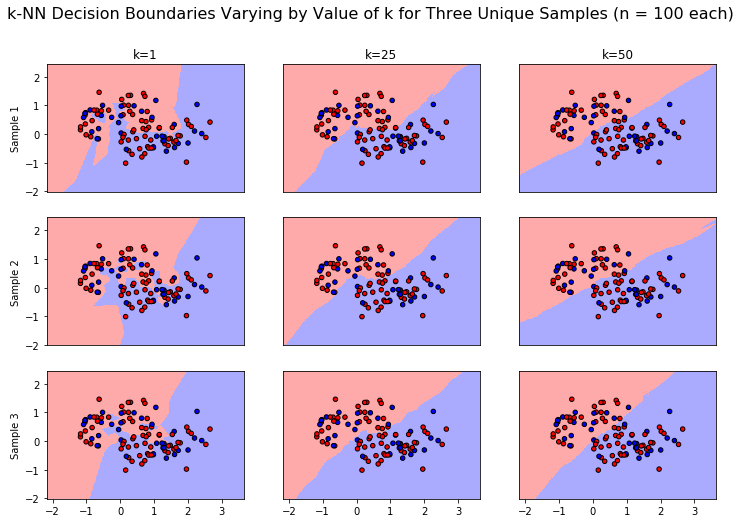

In [11]:
# D Cont.
#============================
# Plot 3 x 3 grid of knn by sample
#============================



import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets


from mpl_toolkits.axes_grid1 import Grid
#fig = plt.figure(figsize=(12, 8))
#grid = Grid(fig, rect=111, nrows_ncols=(3,3), axes_pad=0.25, label_mode='L')
#for i, ax in enumerate(grid):
 #   data = gm_1_1
    #ax.scatter(data[:,0], data[:,1])
#plt.tight_layout()
#plt.xlabel("k threshold")
#plt.ylabel("Samples")
#plt.show()


# Setup figure properties:
fig = plt.figure(figsize=(12, 8))
grid = Grid(fig, rect=111, nrows_ncols=(3,3), axes_pad=0.25, label_mode='L')
fig.suptitle('k-NN Decision Boundaries Varying by Value of k for Three Unique Samples (n = 100 each)', fontsize=16)
#fig.xlabel("x Values")
#fig.ylabel("y Values")
#Part (d): Plot decision boundaries for each combination of sample and k-value

############################## m_1_1

h = .02  # step size in the mesh
plt.subplot(3,3,1)
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = S1[:, 0].min() - 1, S1[:, 0].max() + 1
y_min, y_max = S1[:, 1].min() - 1, S1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
# print(type(m_1_1))
Z = m_1_1.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(S1[:, 0], S1[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("k=1")
#plt.xlabel("X Values")
plt.ylabel("Sample 1")
plt.xticks(())

#plt.show()
#plt.grid(True)

############################## m_1_25

h = .02  # step size in the mesh
plt.subplot(3,3,2)
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = S1[:, 0].min() - 1, S1[:, 0].max() + 1
y_min, y_max = S1[:, 1].min() - 1, S1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
# print(type(m_1_1))
Z = m_1_25.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(S1[:, 0], S1[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("k=25")
#plt.xlabel("X Values")
#plt.ylabel("Y Values")
plt.xticks(())
plt.yticks(())
#plt.show()
#plt.grid(True)
############################## m_1_50

h = .02  # step size in the mesh
plt.subplot(3,3,3)
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = S1[:, 0].min() - 1, S1[:, 0].max() + 1
y_min, y_max = S1[:, 1].min() - 1, S1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
# print(type(m_1_1))
Z = m_1_50.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(S1[:, 0], S1[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("k=50")
#plt.xlabel("X Values")
#plt.ylabel("Y Values")
plt.xticks(())
plt.yticks(())
#plt.show()

############################## m_2_1

h = .02  # step size in the mesh
plt.subplot(3,3,4)
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = S1[:, 0].min() - 1, S1[:, 0].max() + 1
y_min, y_max = S1[:, 1].min() - 1, S1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
# print(type(m_1_1))
Z = m_2_1.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(S1[:, 0], S1[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#plt.title("Decision Boundary for Sample 2, k=1")
#plt.xlabel("X Values")
plt.ylabel("Sample 2")

plt.xticks(())
#plt.show()

############################## m_2_25

h = .02  # step size in the mesh
plt.subplot(3,3,5)
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = S1[:, 0].min() - 1, S1[:, 0].max() + 1
y_min, y_max = S1[:, 1].min() - 1, S1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
# print(type(m_1_1))
Z = m_2_25.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(S1[:, 0], S1[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#plt.title("Decision Boundary for Sample 2, k=25")
#plt.xlabel("X Values")
#plt.ylabel("Y Values")
plt.xticks(())
plt.yticks(())
#plt.show()

############################## m_2_50

h = .02  # step size in the mesh
plt.subplot(3,3,6)
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = S1[:, 0].min() - 1, S1[:, 0].max() + 1
y_min, y_max = S1[:, 1].min() - 1, S1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
# print(type(m_1_1))
Z = m_2_50.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(S1[:, 0], S1[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#plt.title("Decision Boundary for Sample 2, k=50")
#plt.xlabel("X Values")
#plt.ylabel("Y Values")
plt.xticks(())
plt.yticks(())
#plt.show()


############################## m_3_1

h = .02  # step size in the mesh
plt.subplot(3,3,7)
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = S1[:, 0].min() - 1, S1[:, 0].max() + 1
y_min, y_max = S1[:, 1].min() - 1, S1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
# print(type(m_1_1))
Z = m_3_1.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(S1[:, 0], S1[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#plt.title("Decision Boundary for Sample 3, k=1")
#plt.xlabel("X Values")
plt.ylabel("Sample 3")

#plt.show()

############################## m_3_25

h = .02  # step size in the mesh
plt.subplot(3,3,8)
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = S1[:, 0].min() - 1, S1[:, 0].max() + 1
y_min, y_max = S1[:, 1].min() - 1, S1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
# print(type(m_1_1))
Z = m_3_25.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(S1[:, 0], S1[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

#plt.title("Decision Boundary for Sample 3, k=25")
#plt.xlabel("X Values")
#plt.ylabel("Y Values")
plt.yticks(())

#plt.show()

############################## m_3_50

h = .02  # step size in the mesh
plt.subplot(3,3,9)
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = S1[:, 0].min() - 1, S1[:, 0].max() + 1
y_min, y_max = S1[:, 1].min() - 1, S1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
# print(type(m_1_1))
Z = m_3_50.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(S1[:, 0], S1[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

#plt.title("Decision Boundary for Sample 3, k=50")
#plt.xlabel("X Values")
#plt.ylabel("Y Values")
#plt.tight_layout()
plt.yticks(())
plt.show()
####################################

#  Plot Grid


### E. Chart Comparison of Accuracy and Variance

The low values of k tend to best separate the two classes of data; however, these boundaries also vary the most as the data changes. This illustrates the bias-variance trade-off. 

### F. Bias-Variance Trade-off Using Example

A **low k value** has *low bias* and *high variance*. Therefore, it can best distingquish classes (most of the blue points fall in the blue classification, and most of the red points fall in the red classification); however, the decision boundary is highly variable (k=1 decisioin boundary looks very different across S1,S2,S3).

A **high k value** has *high bias* and *low variation*. Therefore, it may have a harder time distinguishing accurate classes, (many blue points fall in the red classification, and many of the red points fall in the blue classification); but the results will vary a lot less across different sub-samples of data (k=50 decison boundary looks very similar across S1,S2,S3).


## 6
**[20 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise will explore the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of mislabeled datapoints).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

## 6- ANSWER

### A. New Make Moons Random Sample (test data)

Below is the code to create a new random sample of n=1000, using the earlier make_moons function, which will act as test data for this exercise. 

**Code for A:**

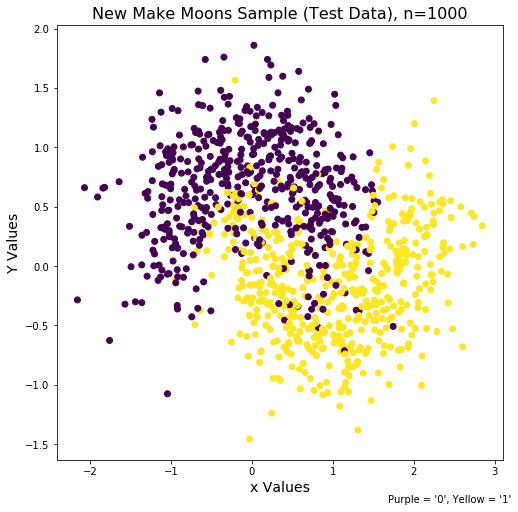

In [12]:
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# A
# ============
# Generate datasets
# ============

dataset_train= dataset
dataset_train_y= dataset[['y']]

np.random.seed(16)

n_samples = 1000
noisy_moons2 = datasets.make_moons(n_samples=n_samples, noise=.35)

#use pandas to make a table
dataset_test = pd.DataFrame(columns= ['x1','x2'],data=noisy_moons2[0])
dataset_test['y'] = noisy_moons2[1]
dataset_test.head()

dataset_test_y= dataset_test[['y']]

fig= plt.figure(figsize= (8,8))
#plt.scatter(data =dataset_train,x= 'x1', y ='x2' , c='y', label= c)
plt.scatter(data =dataset_test,x= 'x1', y ='x2' , c='y')
plt.title("New Make Moons Sample (Test Data), n=1000", fontsize= 16 )
plt.xlabel("x Values", fontsize= 14)
plt.ylabel("Y Values", fontsize= 14)

#plt.legend()

txt="Purple = '0', Yellow = '1'"

fig.text(.7, .05, txt, ha='left')

plt.show()

### B. Train kNN Classifier over k=1 to k=500; Apply to Training and Test Data; Plot Classification Error

Below is the code that trains both the original and second make_moons dataset over many iterations of k, and then creates an array to stor the classification error, which is then plotted.

**Code for B:**

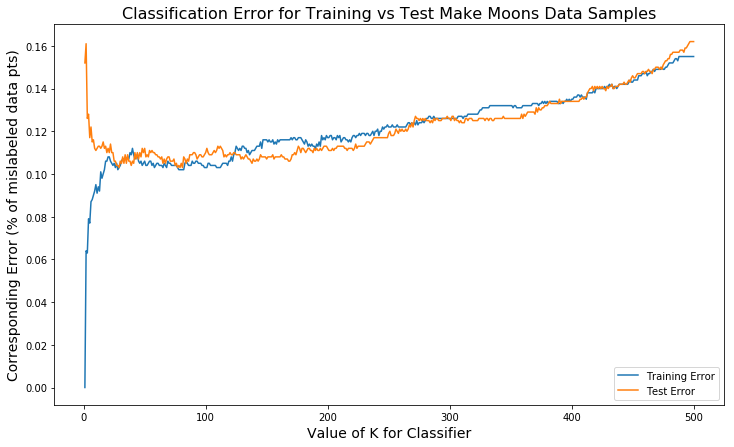

In [13]:
# B
#====================================================
# Train kNN Classifier k 1:500 on Train and Test Data
#====================================================
import matplotlib.pyplot as plt
import sklearn as sklearn
from sklearn import metrics

# set up array to hold error
error_train = []
error_test = []

# set up datasets to runn through classifier from make_mood data
train_x = dataset_train[['x1', 'x2']].values
train_y = dataset_train_y['y'].values
test_x = dataset_test[['x1','x2']].values
test_y = dataset_test_y['y'].values

#create lots of Classifiers for test data
for k in range(1,501):
    golden6= KNeighborsClassifier(n_neighbors=k)
    golden6.fit(train_x, train_y)
    y_pred6 = golden6.predict (train_x)
    error_train.append(1-sklearn.metrics.accuracy_score(train_y, y_pred6))



#create lots of Classifiers for test data
for k in range(1,501):
    golden66= KNeighborsClassifier(n_neighbors=k)
    golden66.fit(train_x, train_y)
    y_pred66 = golden66.predict (test_x)
    error_test.append(1-sklearn.metrics.accuracy_score(test_y, y_pred66))


#plot chart
plt.figure(figsize= (12,7))

plt.plot(range(1,501), error_train, label= "Training Error")
plt.plot(range(1,501), error_test, label= "Test Error")
plt.title("Classification Error for Training vs Test Make Moons Data Samples", fontsize=16)
plt.xlabel("Value of K for Classifier", fontsize=14)
plt.ylabel("Corresponding Error (% of mislabeled data pts)", fontsize=14)
plt.legend()

plt.show()

### C. What trend do you see in the results?

For the test dataset,Between k values of approximately 1 and 20, the error goes from fairly high (16%), to the lowest point on the graph (just over 10%). There is a fluctuation between about 10% and 1% between k values of 20 and about 80, and then after k=80, the error appears to increase steadily.We see that for low k values of the test dataset, the relationship between 1 and about 20 is the inverse, where error is very low.

### D. What values of  k  represent high bias and which represent high variance?

A **low k value** has *low bias* and *high variance*. These may result in greater error, such as when k is in range (1,20) in this example. A **high k value** has *high bias* and *low variation*. These also result in greater error, such as when k is in range (80, $ \infty $). 


### E. What is the optimal value of  k  and why?

The optimal value of k would then likely fall between 20 and 80. I would likely choose a k value of approximately k=20, because that is located in the first "elbow of the data." At this point, the error is the lowest, as it represents a k value that balances bias and variance best for this model.

### F.  In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

Other models have features that provide flexibility specific to their design, called hyperparamaters. For example, in random trees, the number of trees would control the flexibility of the model. Others would include the learning rate for training a neural network, and the C and sigma hyperparameters for support vector machines.

## 7
**[20 points] Linear regression and nonlinear transformations**. You're given a dataset below that is partitioned into a training and testing dataset. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted.

**(c)** A linear model does not mean that non-linear relationships cannot be explored. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$. Here $x_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $x_1 = x$ and $x_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line).

**(e)** Using the models above, apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?

## 7- ANSWER

### A. Scatter Plot of Training Data

Below is the code for plotting the training data provided.

**Code for A:**

In [14]:
x_train = [3.19,9.26,9.38,8.77,7.91,3.79,3.18,7.61,2.36,6.26,6.62,1.53,6.25,7.93,7.07,4.58,4.14,2.14,9.04,4.56,3.99,6.71,2.51,0.84,6.13,5.22,0.25,3.60,1.36,5.59,4.81,1.14,0.36,2.31,1.37,5.86,4.23,9.48,2.26,0.77,4.33]
y_train = [46.40,172.16,209.00,203.31,82.88,62.57,14.38,177.00,8.01,82.35,84.84,-5.59,54.96,167.17,83.09,-21.63,94.64,63.97,106.57,38.99,88.26,66.99,-11.12,-0.44,65.08,61.47,-0.61,23.85,10.55,83.69,54.35,51.82,-18.63,1.98,4.90,55.44,50.09,155.66,45.57,18.12,30.58]

x_test = [5.65,0.07,8.84,5.14,6.65,1.35,5.45,7.39,3.35]
y_test = [98.52,16.09,198.45,75.90,85.11,47.64,14.76,141.03,-39.13]


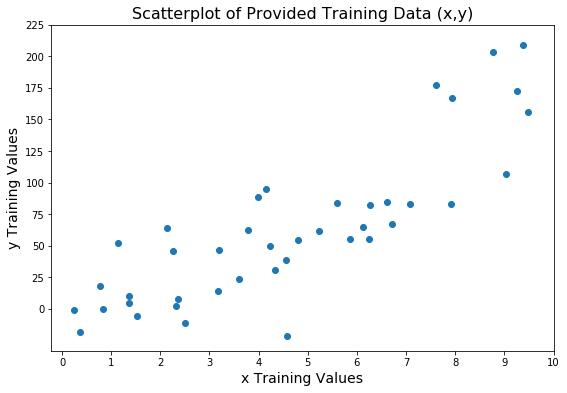

In [15]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


#A
#######################################################################
# Scatter Plot of Training Data
#######################################################################
plt.figure(figsize= (9,6))
plt.scatter(x_train, y_train)
plt.title("Scatterplot of Provided Training Data (x,y)", fontsize=16)
plt.xlabel("x Training Values", fontsize=14)
plt.ylabel("y Training Values", fontsize=14)


plt.xticks((np.arange(0, 11, step=1)))
plt.yticks((np.arange(0, 250, step=25)))

plt.show()



### B. Estimate Linear Model and Corresponding $ R^2 $ and MSE

Below is the code that produced a linear model from the provided training data. 

The **estimated linear model** is as follows:

$ y= 18.3x-21.73 $

$ R^2 = 0.70 $

$MSE = 1052.59 $

**Code for B:**

Transformed training Data Intercept: [-21.73078293]
Training Data Model Coefficients: [18.30320685]
Training Data Variance Score(R2): 0.7014590913812251
Training Data MSE: 1052.5853662498014


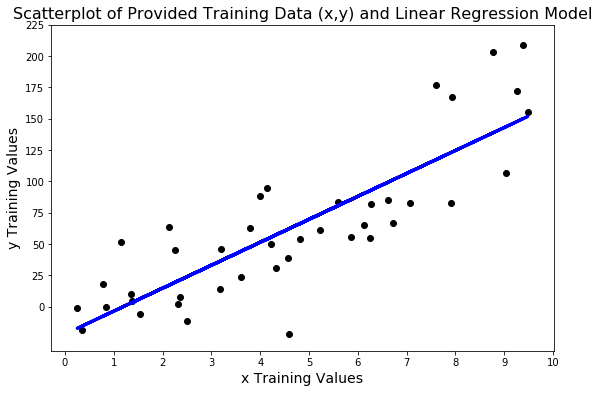

In [16]:

#B
#######################################################################
# Estimate Linear Model
#######################################################################

#pairs = [[x, y] for x, y in zip(x_train, y_train)]
#print(pairs)
x_train = np.array(x_train).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)
print("Transformed training Data Intercept:", regr.intercept_)
print("Training Data Model Coefficients:", regr.coef_[0])
print("Training Data Variance Score(R2):", regr.score(X=x_train, y=y_train))
print("Training Data MSE:", mean_squared_error(y_pred = regr.predict(x_train), y_true= y_train))


# Make predictions using the train set
y_pred = regr.predict(x_train)


# Plot outputs
plt.figure(figsize= (9,6))
plt.plot(x_train, y_pred, color='blue', linewidth=3)
plt.scatter(x_train, y_train, color='black')
plt.title("Scatterplot of Provided Training Data (x,y) and Linear Regression Model", fontsize=16)
plt.xlabel("x Training Values", fontsize=14)
plt.ylabel("y Training Values", fontsize=14)


plt.xticks((np.arange(0, 11, step=1)))
plt.yticks((np.arange(0, 250, step=25)))

plt.show()


### C. Estimation of Transformed Model Using Training Data: (log(x))

Below is the code that estimated a model using a transformation of x using **log(x)**.

In order to prepare the training data for modeling, I took the element-wise log of the x values, and concatenated the original values to the x value array (as you include both in the model equation).

The resulting coefficients for the **linear model of transformed x (log(x))**, is expressed in equation form are as follows:

$ y=  25.08x -23.33log(x)-23.68 $

$ R^2 = 0.72 $

$MSE = 980.35 $

**Code for C:**

In [17]:
# C
#######################################################################
#Transformation of x- log(x)
#######################################################################

#Revised Estimated Equation

x_trainT= [math.log(x) for x in x_train]
x_testT= [math.log(x) for x in x_test]
X_trainT= np.c_[np.array(x_trainT), np.array(x_train)]
X_testT= np.c_[np.array(x_testT), np.array(x_test)]


# Create linear regression object
regr2 = linear_model.LinearRegression()

# Train the model using the training sets
regr2.fit(X_trainT, y_train)

# Make predictions using the training set
y_pred2 = regr2.predict(X_trainT)

print("Transformed training Data Intercept:", regr2.intercept_)
print("Transformed training Data Model Coefficients:", regr2.coef_[0])
print("Transformed training Data Variance Score(R2):", regr2.score(X=X_trainT, y=y_train))
print("Transformed training Data MSE:", mean_squared_error(y_pred = regr2.predict(X_trainT), y_true= y_train))


Transformed training Data Intercept: [-23.68015013]
Transformed training Data Model Coefficients: [-23.33063096  25.08280536]
Transformed training Data Variance Score(R2): 0.7219455369854199
Transformed training Data MSE: 980.3549541792602


### C2. Estimation of Transformed Model Using Training Data:$ (x^2) $

Below is the code that estimated a model using a transformation of x using $x^2$.

In order to prepare the training data for modeling, I took the element-wise log of the x values, and concatenated the original values to the x value array (as you include both in the model equation).

The resulting coefficients for the **linear model of transformed model**, is expressed in equation form are as follows:

$ y=  1.83 x^2 + .47x +8 $

$ R^2 = 0.74 $

$MSE = 884.80 $


**Code for C:**

In [18]:
# C2
#######################################################################
#Transformation of x- x^2
#######################################################################

#Revised Estimated Equation

x_trainT2= [math.pow(x,2) for x in x_train]
x_testT2= [math.pow(x,2) for x in x_test]
X_trainT2= np.c_[np.array(x_trainT2), np.array(x_train)]
X_testT2= np.c_[np.array(x_testT2), np.array(x_test)]


# Create linear regression object
regr3 = linear_model.LinearRegression()

# Train the model using the training sets
regr3.fit(X_trainT2, y_train)

# Make predictions using the training set
y_pred3 = regr3.predict(X_trainT2)

print("Transformed training Data Intercept:", regr3.intercept_)
print("Transformed training Data Model Coefficients:", regr3.coef_[0])
print("Transformed training Data Variance Score(R2):", regr3.score(X=X_trainT2, y=y_train))
print("Transformed training Data MSE:", mean_squared_error(y_pred = regr3.predict(X_trainT2), y_true= y_train))


Transformed training Data Intercept: [8.00733746]
Transformed training Data Model Coefficients: [1.83208191 0.47100686]
Transformed training Data Variance Score(R2): 0.7490480719353505
Transformed training Data MSE: 884.797759660905


### D. Plot of Training Data and both the Original and Transformed Linear Models

Below is the code that plots the **orginal training data**, along with both of the equations:

$ y=  25.08x -23.33log(x)-23.68 $

$ y=  1.83 x^2 + .47x +8 $

$ y= 18.3x-21.73 $

**Code for D:**

C:\Users\ayoung\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


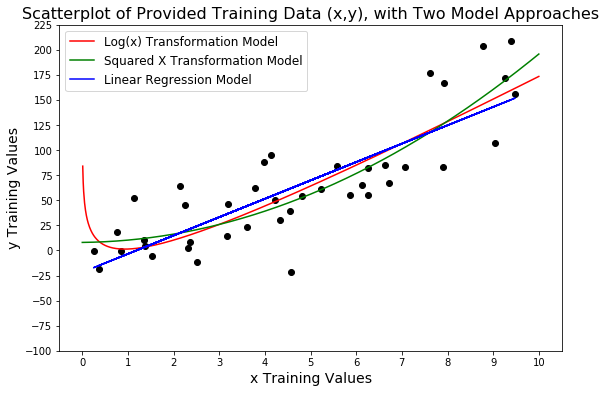

In [19]:
#D
#######################################################################
# Plot data and 2 models
#######################################################################

plt.figure(figsize= (9,6))

x = np.linspace(0, 10, 1000)
plt.plot(x, -23.68+(25.08*x)-(23.33*(np.log(x))), label="Log(x) Transformation Model", c="red")
plt.plot(x, 1.83*(x**2)+.47*x+8, label= "Squared X Transformation Model", c="green")
plt.scatter(x_train, y_train, color='black')
plt.plot(x_train, y_pred, color='blue', label= "Linear Regression Model")
#plt.scatter(x_trainT, y_train, color ="green")
#plt.plot(x_train, y_pred2, color='red', linewidth=3, label="Transformed Regression Model (log(x))")
plt.legend(fontsize= 12)
plt.title("Scatterplot of Provided Training Data (x,y), with Two Model Approaches", fontsize=16)
plt.xlabel("x Training Values", fontsize=14)
plt.ylabel("y Training Values", fontsize=14)

plt.xticks((np.arange(0, 11, step=1)))
plt.yticks((np.arange(-100, 250, step=25)))

plt.show()



### E. Apply Models to Test Data

Below is the code that uses the provided test data, to predict a series of outcomes, based on the two models I created above.

The **orginal model**, using the **Test data**, provided the following results:

$ R^2 = 0.56 $

$MSE = 2023.31 $

The **transformed model of log(x)**, using the **test data**, provided the following results:

$ R^2 = 0.63 $

$MSE = 1686.33 $

The **transformed model of squared x**, using the **test data**, provided the following results:

$ R^2 = 0.69 $

$MSE = 1398.88 $


**Code for E:**

In [20]:
#E
#######################################################################
# Apply 2 models to test data
#######################################################################

#Estimated Equation 1, R^2 and Mean Sq Error (Test Data)


# Make Model predictions using the test set

print("Test Data Variance Score(R2) [normal x]:", regr.score(X=x_test, y=y_test))
print("Test Data MSE [normal x]:", mean_squared_error(y_pred = regr.predict(x_test), y_true= y_test))

#Estimated Equation 2, R^2 and Mean Sq Error (Test Data)
# Train the model using the training sets

print("Test Data Variance Score(R2) [log x]:", regr2.score(X=X_testT, y=y_test))
print("Test Data MSE [log x]:", mean_squared_error(y_pred = regr2.predict(X_testT), y_true= y_test))


print("Test Data Variance Score squared x:", regr3.score(X=X_testT2, y=y_test))
print("Test Data MSE [log x]:", mean_squared_error(y_pred = regr3.predict(X_testT2), y_true= y_test))




Test Data Variance Score(R2) [normal x]: 0.5556465885794163
Test Data MSE [normal x]: 2023.3121088887128
Test Data Variance Score(R2) [log x]: 0.6318499871688503
Test Data MSE [log x]: 1676.3287052696069
Test Data Variance Score squared x: 0.6927820089560347
Test Data MSE [log x]: 1398.8817580143934


### F. Interpretations

*Which models work better on training data? Why?*

The **squared x model** works better on the **training data**, as evidenced by a higher $ R^2 $ value of **0.74**, and lower MSE value of **884.80**.


*Which models work better on test data? Why?*

The **squared x model** also works better on the **test data**, as evidence by a higher $ R^2 $ value of **0.69**, and lower MSE of **1398.88**.


### G. Scenario

*If test data different than training data, how impact model? Why?*

If the test data are quite different than the training data, then the model may not work well for the test data. The model is created using information from the training data, so if the test data is not representative of the same sampling frame from which the training data was derived, the model is not generalizable to that sample.
